In [4]:
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import numpy as np
from pathlib import Path
from utils.metrics import *

Loading the results for training and validation

In [5]:
run_id = 'run_1696756439'
result_dir = Path("../results/additive/") / run_id

with open(result_dir / "results_training.pkl", "rb") as file:
    results_training = pickle.load(file)

with open(result_dir / "results_validation.pkl", "rb") as file:
    results_validation = pickle.load(file)


Plotting the different metrics and the loss functions for the different k-folds

In [6]:
from utils.metrics import compute_metrics_per_epoch, plot_mean_std, plot_roc_curve_mean_std

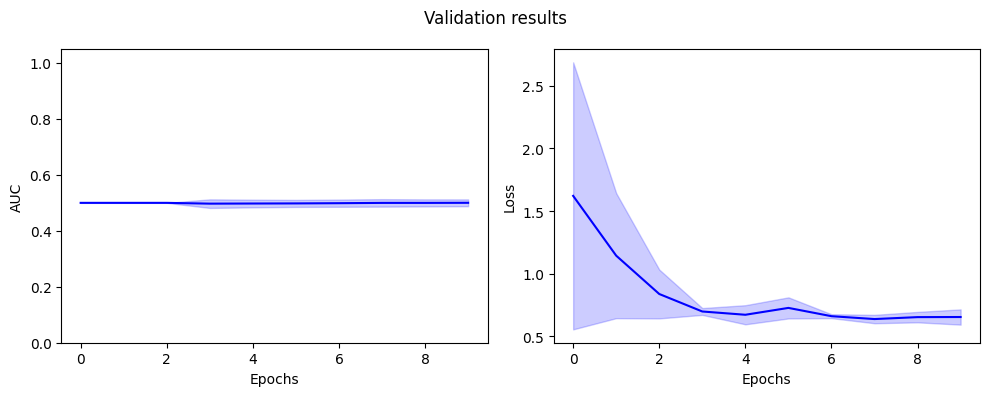

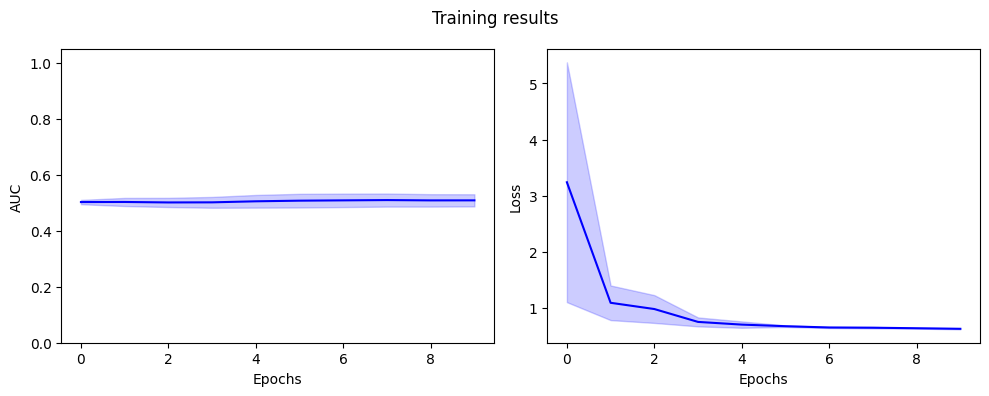

In [7]:
val_auc_mean, val_auc_std = compute_metrics_per_epoch(results_validation, roc_auc_score)
val_loss_mean, val_loss_std = compute_metrics_per_epoch(results_validation, "loss")

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0] = plot_mean_std(axes[0], val_auc_mean, val_auc_std, y_label="AUC")
axes[0].set_ylim([0.0, 1.05])
axes[1] = plot_mean_std(axes[1], val_loss_mean, val_loss_std, y_label="Loss")
fig.suptitle('Validation results')
plt.tight_layout()
plt.show()

train_auc_mean, train_auc_std = compute_metrics_per_epoch(results_training, roc_auc_score)
train_loss_mean, train_loss_std = compute_metrics_per_epoch(results_training, "loss")

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0] = plot_mean_std(axes[0], train_auc_mean, train_auc_std, y_label="AUC")
axes[0].set_ylim([0.0, 1.05])
axes[1] = plot_mean_std(axes[1], train_loss_mean, train_loss_std, y_label="Loss")
fig.suptitle('Training results')
plt.tight_layout()
plt.show()

Plot the ROC curve for each fold

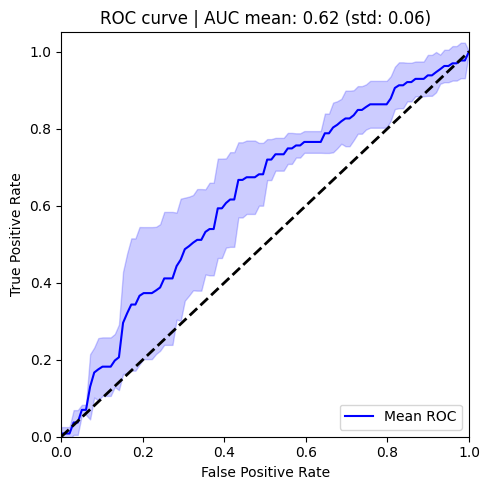

Area Under the Curve -- mean: 0.62, std: 0.06 


In [8]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax, aucs = plot_roc_curve_mean_std(ax, results_validation)
plt.title("ROC curve | AUC mean: {:.2f} (std: {:.2f})".format(np.mean(aucs), np.std(aucs)))
plt.tight_layout()
plt.show()
print("Area Under the Curve -- mean: {:.2f}, std: {:.2f} ".format(np.mean(aucs), np.std(aucs)))
